In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import math
from common import NWSL, Fonts, Colors, add_signature, Data

In [2]:
df = pd.read_csv("data/historical_clinching_augmented.csv")
df.index = df.index + (df["season"]-2013)
df["days_left"] = df["days_left"].replace(0, 0.5)
df

,season,team,position,date,announced_date,weeks_left,season_end,days_left
0,2013,WNY,1,2013-08-07,2013-08-07,2,2013-08-18,11.0
1,2013,KC,2,2013-08-04,2013-08-04,2,2013-08-18,14.0
2,2013,POR,3,2013-08-07,2013-08-07,2,2013-08-18,11.0
3,2013,NJNY,4,2013-08-07,2013-08-07,2,2013-08-18,11.0
5,2014,RGN,1,2014-07-17,2014-07-20,4,2014-08-20,31.0
6,2014,KC,2,2014-08-02,2014-08-06,2,2014-08-20,14.0
7,2014,POR,3,2014-08-17,2014-08-17,0,2014-08-20,3.0
8,2014,WAS,4,2014-08-17,2014-08-17,0,2014-08-20,3.0
10,2015,RGN,1,2015-08-12,2015-08-12,3,2015-09-06,25.0
11,2015,CHI,2,2015-08-23,2015-08-23,2,2015-09-06,14.0


<Figure size 4000x6800 with 0 Axes>

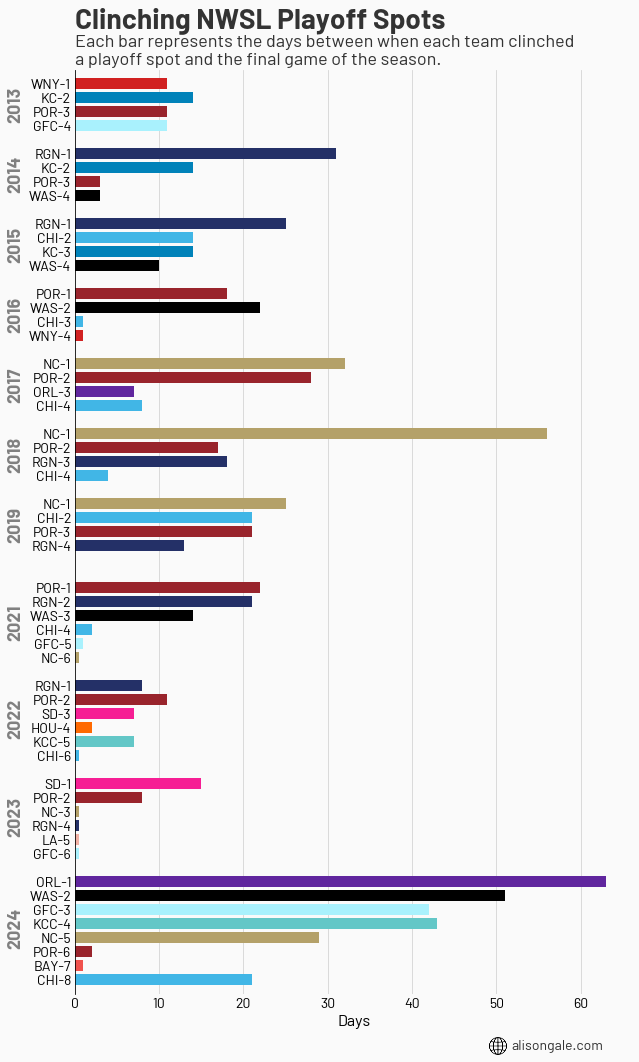

In [4]:
plt.rcParams["figure.figsize"] = (10, 17)
plt.figure(dpi=400)
fig, ax = plt.subplots()
ax.set_facecolor(Colors.WHITE)
fig.patch.set_facecolor(Colors.WHITE)

# Plot data
BLUE = "#0198FF"


def format_name(row):
    team = row["team"]
    if team == "NJNY":
        team = "GFC"

    position = row["position"]
    if position > 0:
        position = "-" + str(int(position))
    else:
        position = ""
    return team + position


plt.barh(
    df.index, df["days_left"], color=list(map(lambda x: NWSL.color(x), df["team"]))
)

# Axes
ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.set_yticks(df.index)
ax.set_yticklabels(df.apply(format_name, axis=1))
ax.set_ylim([-1, max(df.index) + 1])
ax.invert_yaxis()
ax.set_xlabel("Days", font=Fonts.BARLOW, size=16)
ax.tick_params(axis="both", which="both", length=0)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(14)
    label.set_fontproperties(fp)

# Year labels
for season in df["season"].unique():
    subset = df[df["season"] == season]
    ax.text(
        -8,
        sum(subset.index) / len(subset.index) + 1,
        season,
        fontproperties=Fonts.BARLOW_BOLD,
        color=Colors.GRAY,
        size=18,
        rotation=90,
    )

# Title
ax.text(
    0,
    -4,
    "Clinching NWSL Playoff Spots",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    0,
    -1.4,
    "Each bar represents the days between when each team clinched\na playoff spot and the final game of the season.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

add_signature(fig, x=0.7, y=0.07, fs=14, w=0.025)

# Save image
plt.savefig(
    "images/historical.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)